# Data exploration and feature engineering for predictive analytics

Survival classification using [Titanic dataset](https://www.kaggle.com/c/titanic/data).

Dataset:  
1. You need to upload the titanic train and test datasets to Google Colab.  
2. You should click on the '>' icon to the left (below the title bar), expand the left menu.  
3. Select Files tab.  
4. Click upload to upload the tp3_titanic_data.csv file.  
Note: You need to upload these datasets everytime you reconnect to the notebook.  

Step 1:  Data Exploration.  

Step 2:  Data cleaning and Feature Engineering  

Step 3:  Predictive Modeling using Decision Tree 

Step 4:  Predictive Modeling using Neural Network 

Step 5:  Accuracy Evaluation






![alt text](https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=600w)

## Load data

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [ ]:
# Make sure you upload the two data files as instructed above.
df = pd.read_csv('tp3_titanic_data.csv')

## Step 1: Data Exploration

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For your reference, the Data Dictionary is as follows :

Survived: 0 = No, 1 = Yes  (what we are trying to predict)

pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd  
sibsp: # of siblings/spouse aboard  
parch: # of parents/children aboard  
ticket: Ticket number  
cabin: Cabin number  
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton  

In [ ]:
print('Train Shape (rows, columns):', df.shape)

Train Shape (rows, columns): (891, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that Age attribute is missing in many records/vectors. Only 714/891 contain a value for Age.

Similarly, Cabin values - 204/ 891  

In [ ]:
# Let's write a function to create a column chart with respect to outcome feature. 
# i.e. survival based on a given feature type. (i.e. survival based on gender)
def bar_chart(dataframe, feature):
    survived = dataframe[dataframe['Survived']==1][feature].value_counts()
    dead = dataframe[dataframe['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

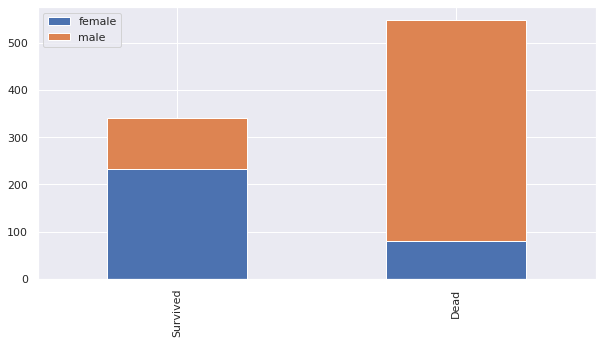

In [ ]:
bar_chart(df, 'Sex')

This chart conveys more women than men survived.

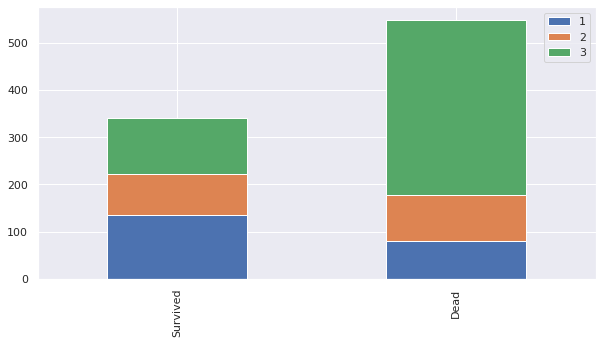

In [ ]:
bar_chart(df, 'Pclass')


This chart conveys first class mostly survived, and third class mostly died.


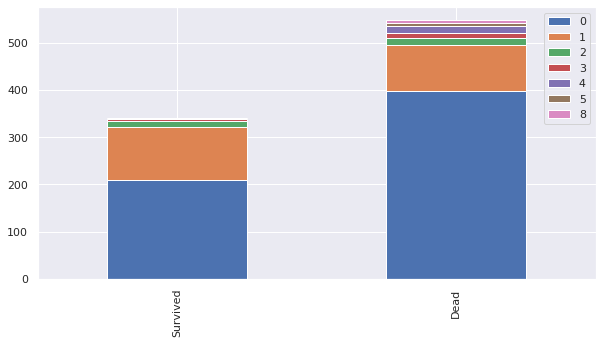

In [ ]:
bar_chart(df, 'SibSp')

What does this chart tell you?

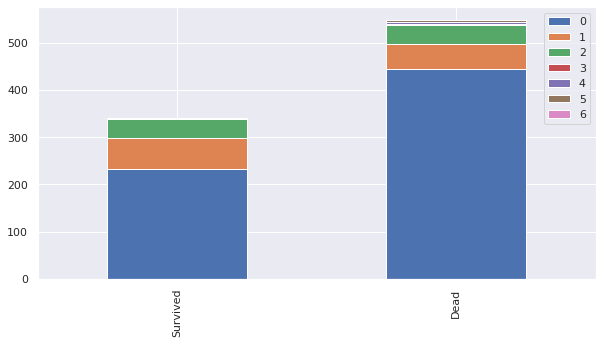

In [ ]:
bar_chart(df, 'Parch')

What does this chart tell you?

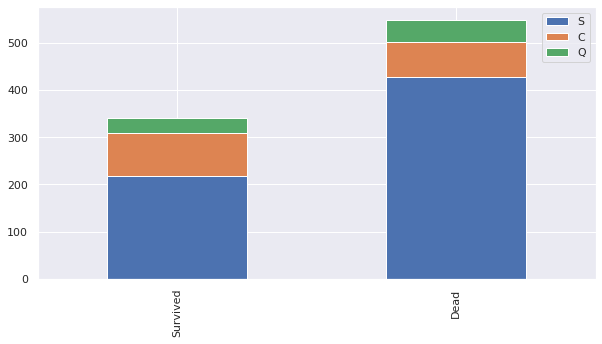

In [ ]:
bar_chart(df, 'Embarked')

What does this chart tell you?

Also pay attention to how the function works:



```
def bar_chart(dataframe, feature):

    survived = dataframe[dataframe['Survived']==1][feature].value_counts()
    dead = dataframe[dataframe['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
```





## Step 2: Wrangling and Feature Engineering

### Extracting salutation (title) from passenger name

Passenger name is not useful for this classification task.  
However, deriving the salutation (or title) of each passenger from the name could be useful  (e.g., Mrs, Mr, Ms, Dr.)

In [ ]:
# Extract titles
# The regex will extract the string before period sign.
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Lady          1
Capt          1
Jonkheer      1
Countess      1
Ms            1
Sir           1
Don           1
Name: Title, dtype: int64

In [ ]:
# Standardize (normalise) titles in a meaningful manner
# i.e., we reduce all 17 titles to only 4 (Mr, Miss, Mrs and Others).
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
df['Title'] = df['Title'].map(title_mapping)

In [ ]:
df['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

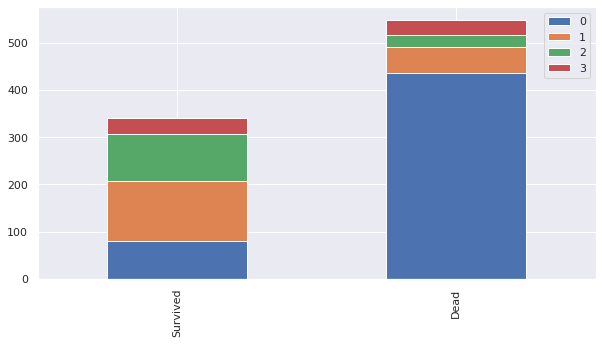

In [ ]:
bar_chart(df, 'Title')

In [ ]:
# delete unnecessary feature (i.e., Name) from dataset
df.drop('Name', axis=1, inplace=True)

Why did we remove name and kept title separately?  (Hint: Nominal variables)

### Transforming gender from categorical to numerical attribute.

Transform Sex column to numeric format.

In [ ]:
# What do we have?
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)

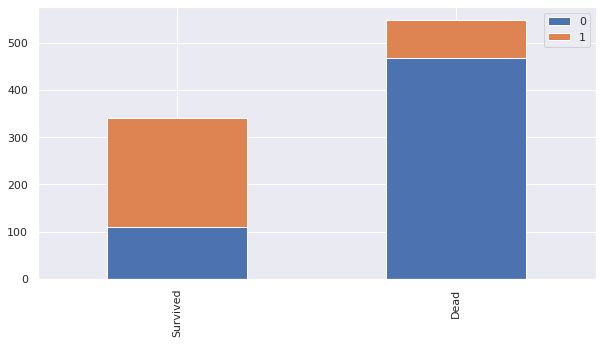

In [ ]:
bar_chart(df, 'Sex')

### Missing value imputation and Binning

Missing value imputation for the Age attribute. Use median age based on the title attribute for missing Age.

In [ ]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)

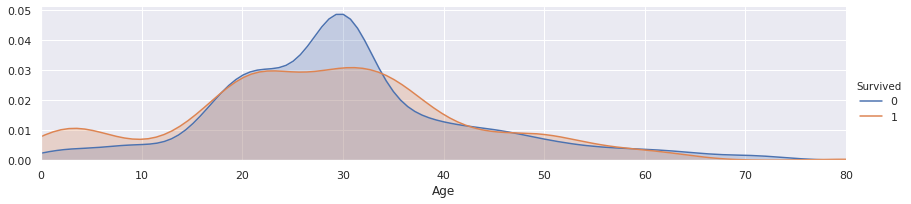

In [ ]:
# Age distribution
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

Binning/Converting Numerical Age to Categorical Variable. 

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4  

In [ ]:
df.loc[ df['Age'] <= 16, 'Age'] = 0,
df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1,
df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2,
df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3,
df.loc[ df['Age'] > 62, 'Age'] = 4

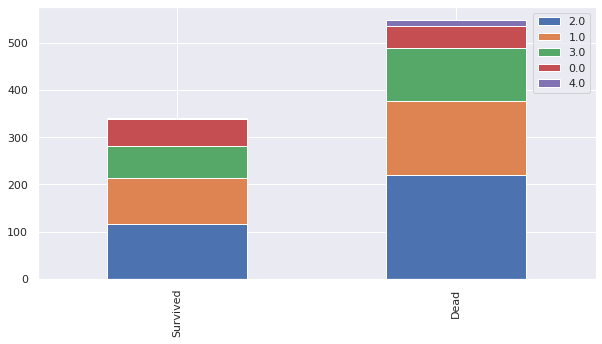

In [ ]:
bar_chart(df, 'Age')

Missing value imputation for Embarked

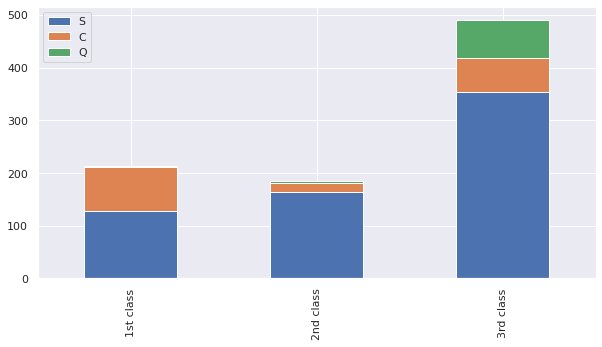

In [ ]:
Pclass1 = df[df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass']==3]['Embarked'].value_counts()
df_combined = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df_combined.index = ['1st class','2nd class', '3rd class']
df_combined.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark  

***fill out missing embark with S embark***

In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

Missing value imputation and Binning for Fare

In [ ]:
# fill missing Fare with median fare for each Pclass
df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [ ]:
# Binning
df.loc[ df['Fare'] <= 17, 'Fare'] = 0,
df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 1,
df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 2,
df.loc[ df['Fare'] > 100, 'Fare'] = 3

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


Standardizing and missing value imputation for Cabin

In [ ]:
df.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
E101           3
              ..
B42            1
C118           1
B50            1
B82 B84        1
B80            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df['Cabin'] = df['Cabin'].str[:1]

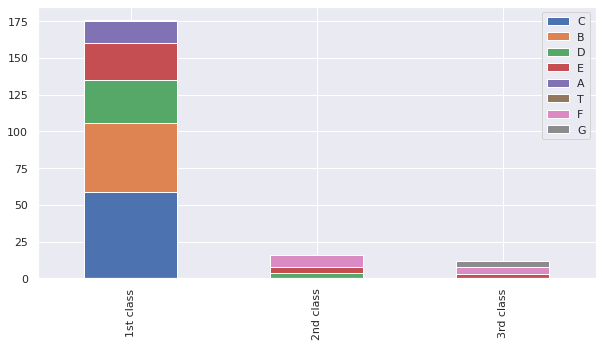

In [ ]:
Pclass1 = df[df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df[df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df[df['Pclass']==3]['Cabin'].value_counts()
df_combined = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df_combined.index = ['1st class','2nd class', '3rd class']
df_combined.plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
df['Cabin'] = df['Cabin'].map(cabin_mapping)

In [ ]:
# fill missing Fare with median fare for each Pclass
df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)  # Use median value for replacement

### Delete unused features

Note: Ticket, SibSp and Parch are potential good features. For the workshop, we will remove them however, you may use your knowledge on predictive analytics to identify a way to use them, in order to improve the accuracy.

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


**Note: You may run the following line of code only once (to drop columns).**  
Because once a column is dropped, it will no longer be part of the dataset. Then reattempting to drop the came columns will cause an error as python cannot find such column names in the dataset.

In [ ]:
features_drop = ['Ticket', 'SibSp', 'Parch', 'PassengerId']
df = df.drop(features_drop, axis=1)

### Data Split

In [ ]:
from sklearn.model_selection  import train_test_split

Y_train = df['Survived']
X_train = df.drop('Survived', axis=1)

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.33, random_state = 5)

print('Train Shape (rows, columns):', X_train.shape)
print('Validation Shape (rows, columns):', X_validation.shape)

Train Shape (rows, columns): (596, 7)
Validation Shape (rows, columns): (295, 7)


## Step 3: Modelling - Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


There are number of parameters that can be fine-tuned for improved accuracy.  
Parameters can be found in the API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_validation)

### Accuracy Evaluation

We consider 3 metrics to evaluate this classification model.  
1. Accuracy  (API: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  
2. Confusion Matrix  (API: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
3. Precision and Recall  (API: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)  

In [ ]:
# Evaluate Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_validation, Y_predict)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 82.37%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_validation, Y_predict, labels=[0, 1])

array([[173,  14],
       [ 38,  70]])

In [ ]:
# Evaluate precision and recall
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f_score, support = precision_recall_fscore_support(Y_validation, Y_predict, labels=[0, 1])
print('precision: {}(0), {}(1)'.format(precision[0], precision[1]))
print('recall: {}(0), {}(1)'.format(recall[0], recall[1]))
print('f_score: {}(0), {}(1)'.format(f_score[0], f_score[1]))
print('support: {}(0), {}(1)'.format(support[0], support[1]))

precision: 0.8199052132701422(0), 0.8333333333333334(1)
recall: 0.9251336898395722(0), 0.6481481481481481(1)
f_score: 0.8693467336683417(0), 0.7291666666666669(1)
support: 187(0), 108(1)


### Visualize the decision tree  
We would need following libraries to display the tree.  
Note that the column names are ordered as they appear in the input dataframe.  
i.e., (X1=Pclass, X2=Sex, X3=Age, X4=Fare, X5=Cabin, X6=Embarked, X7=Title)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

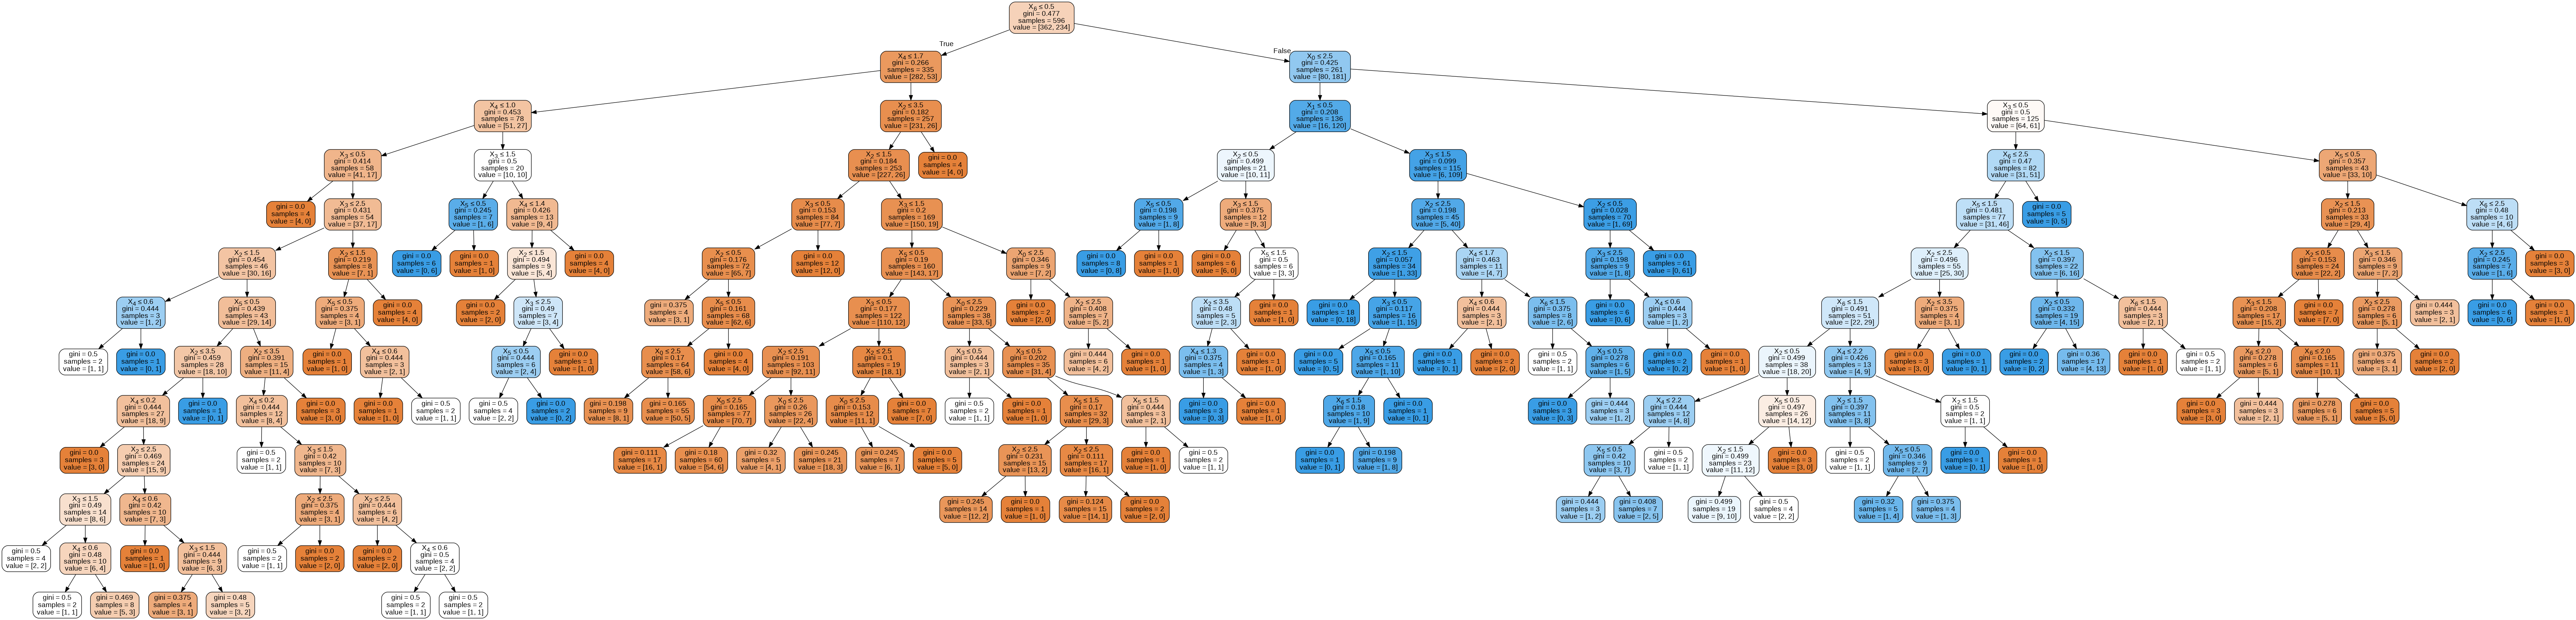

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 240 to 867
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    596 non-null    int64  
 1   Sex       596 non-null    int64  
 2   Age       596 non-null    float64
 3   Fare      596 non-null    float64
 4   Cabin     596 non-null    float64
 5   Embarked  596 non-null    int64  
 6   Title     596 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 37.2 KB


##Step 4: Modelling - Neural Network Classification

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000)

In [ ]:
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
Y_predict = mlp.predict(X_validation)

### Accuracy Evaluation

In [ ]:
# Evaluate Accuracy
accuracy = accuracy_score(Y_validation, Y_predict)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 84.07%


In [ ]:
confusion_matrix(Y_validation, Y_predict, labels=[0, 1])

array([[175,  12],
       [ 35,  73]])

In [ ]:
# Evaluate precision and recall
precision, recall, f_score, support = precision_recall_fscore_support(Y_validation, Y_predict, labels=[0, 1])
print('precision: {}(0), {}(1)'.format(precision[0], precision[1]))
print('recall: {}(0), {}(1)'.format(recall[0], recall[1]))
print('f_score: {}(0), {}(1)'.format(f_score[0], f_score[1]))
print('support: {}(0), {}(1)'.format(support[0], support[1]))

precision: 0.8333333333333334(0), 0.8588235294117647(1)
recall: 0.9358288770053476(0), 0.6759259259259259(1)
f_score: 0.8816120906801008(0), 0.7564766839378239(1)
support: 187(0), 108(1)


##Accuracy Analysis 
  
  Decision Tree vs. Neural Network Classification  
    
  ![alt text](https://i.ibb.co/WPmgm2R/classification-accuracy.png)

## Reference Documents

*   [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
*   [Titanic Solution with sklearn classifiers](https://www.kaggle.com/minsukheo/titanic-solution-with-sklearn-classifiers)

